### Exercise.1.1 Exploration of data

In [1]:
import numpy as np
import pandas as pd

cancer_data = pd.read_csv("cancer_reg.csv", encoding = "latin-1")

In [11]:
true_false_mask = pd.isnull(cancer_data).sum().values == 0
new_cancer_data = cancer_data[cancer_data.columns[true_false_mask]]

In [15]:
<dataframe-name-here>.select_dtypes(include="number").columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [16]:
<data_frame_name>["col1 name", "col2 name"].corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.132244,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.056183,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.386066,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.105174,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.724175,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.052677,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.822534,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.092545,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,0.004665,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,0.082232,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


In [22]:
only_target_corrs = new_cancer_data.corr()["TARGET_deathRate"]
top5_vars = only_target_corrs.sort_values(ascending = False)[1:6].index

In [23]:
top5_vars

Index(['incidenceRate', 'PctPublicCoverageAlone', 'povertyPercent',
       'PctHS25_Over', 'PctPublicCoverage'],
      dtype='object')

<AxesSubplot:xlabel='incidenceRate', ylabel='TARGET_deathRate'>

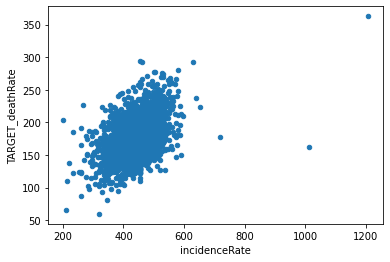

In [31]:
new_cancer_data[["TARGET_deathRate", "incidenceRate"]].plot.scatter("incidenceRate", "TARGET_deathRate")

In [32]:
from sklearn.model_selection import train_test_split

X = new_cancer_data[top5_vars]
y = new_cancer_data["TARGET_deathRate"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30)

In [54]:
def lr_from_scratch(X, y):
    new_X = np.hstack((np.ones((X.shape[0],1)),X)) 

    first_term = np.dot(np.transpose(new_X), new_X)
    second_term = np.dot(np.transpose(new_X), y)

    result = np.dot(np.linalg.inv(first_term), second_term)
    return result

In [61]:
def predict_from_lr_scrach(X):
    trained_coefs = lr_from_scratch(X_train, y_train)

    new_X = np.hstack((np.ones((X.shape[0],1)),X))

    predictions = np.dot(new_X, trained_coefs)
    return predictions

In [55]:
lr_from_scratch(X_train.values, y_train.values)

array([22.22211166,  0.208323  ,  1.24000611,  1.02268328,  1.05150611,
       -0.41034613])

In [ ]:
from sub_package import Model_class

In [ ]:
model_name = Model_class()

In [ ]:
model_name.fit(X_train, y_train)

In [ ]:
predictions_test = model_name.predict(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
lr.coef_

array([ 0.208323  ,  1.24000611,  1.02268328,  1.05150611, -0.41034613])

In [60]:
lr.intercept_

22.222111659063643